In [1]:
import csv

In [2]:
with open("data/AAPL.csv", 'r') as f:
    aapl_data = list(csv.reader(f))

In [3]:
with open("data/GOOG.csv", 'r') as f:
    goog_data = list(csv.reader(f))

In [32]:
aapl = {}

In [33]:
new_aapl_data = list(zip(*aapl_data[1:]))

In [34]:
from datetime import datetime

In [36]:
for idx, col_name in enumerate(aapl_data[0]):
    if col_name != 'Date':
        aapl[col_name] = list(map(float, new_aapl_data[idx]))
    else:
        aapl[col_name] = list(map(lambda x: 
                                  datetime.strptime(x, "%Y-%m-%d"),
                                  new_aapl_data[idx]))

In [37]:
aapl.keys()

dict_keys(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [23]:
import matplotlib.pyplot as plt

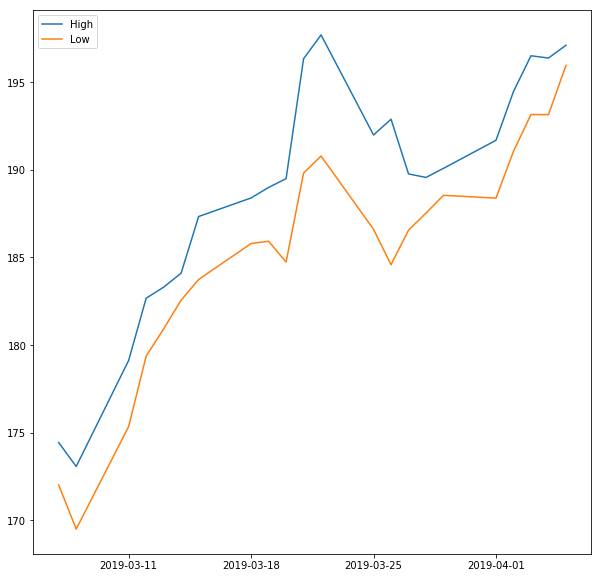

In [43]:
plt.figure(figsize=(10,10))
plt.plot(aapl['Date'], aapl['High'], label='High')
plt.plot(aapl['Date'], aapl['Low'], label='Low')
plt.legend()

# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)

>pandas is an open source, BSD-licensed library providing **high-performance**, **easy-to-use data structures** and **data analysis tools** for the Python programming language.  Pandas stands for “Python Data Analysis Library”. According to the Wikipedia page on Pandas, “the name is derived from the term “panel data”, an econometrics term for multidimensional structured data sets.” 

## Why use Pandas?

What’s cool about Pandas is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called **data frame** that looks very similar to table in a statistical software (think Excel). This is so much easier to work with in comparison to working with lists and/or dictionaries through for loops or list comprehension!

So, in a way:

# <center>ARRAY + TABLE = PANDAS</center>

![](https://memegenerator.net/img/instances/500x/51740682/you-are-a-python-lover-if-pandas-doesnt-mean-but-httppandaspydataorg.jpg)

## Installation

Simply,
```
pip install pandas
```

## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [44]:
import pandas as pd

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [45]:
imdb_df = pd.read_csv("data/imdb_1000.csv")

In [46]:
type(imdb_df)

pandas.core.frame.DataFrame

In [49]:
imdb_df.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [52]:
imdb_df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [61]:
bikes_df = pd.read_csv("data/bikes.csv", sep=';',
                      parse_dates=['Date'], dayfirst=True,
                      index_col='Date')

In [62]:
bikes_df.head()

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0
2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0
2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0


In [169]:
bikes_df = pd.read_csv("data/bikes.csv", sep=';', parse_dates=['Date'], dayfirst=True, index_col='Date')

In [67]:
bikes_df.head()

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0
2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0
2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0


In [68]:
bikes_df.columns

Index(['Unnamed: 1', 'Rachel / Papineau', 'Berri1', 'Maisonneuve_2',
       'Maisonneuve_1', 'Brébeuf', 'Parc', 'PierDup',
       'CSC (Côte Sainte-Catherine)', 'Pont_Jacques_Cartier'],
      dtype='object')

In [72]:
bikes_df.index.dtype

dtype('<M8[ns]')

In [69]:
bikes_df.dtypes

Unnamed: 1                      object
Rachel / Papineau                int64
Berri1                           int64
Maisonneuve_2                    int64
Maisonneuve_1                    int64
Brébeuf                        float64
Parc                             int64
PierDup                          int64
CSC (Côte Sainte-Catherine)      int64
Pont_Jacques_Cartier           float64
dtype: object

## Creating dataframe

A list of lists/tuples can be used to create a DataFrame.

In [73]:
# The inital set of baby names and bith rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [74]:
BabyDataSet = list(zip(names,births))

In [75]:
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [76]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])

In [77]:
df.head()

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [80]:
# saving dataframe as csv file
df.to_csv('data/births.csv', index=False)

## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [81]:
imdb_df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [87]:
imdb_df['title'].dtype

dtype('O')

In [88]:
type(imdb_df['title'])

pandas.core.series.Series

In [89]:
bikes_df['Berri1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-12-02     324
2012-12-03    1286
2012-12-04    1264
2012-12-05    1204
2012-12-06    1252
2012-12-07    1151
2012-12-08     382
2012-12-09     427
2012-12-10     245
2012-12-11     517
2012-12-12     598
2012-12-13     655
2012-12-14     738
2012-12-15     335
2012-12-16     177
2012-12-17     236
2012-12-18     242
2012-12-19     346
2012-12-20     433
2012-12-21     178
2012-12-22      84
2012-12

In [90]:
# selecting multiple columns at once
imdb_df[['star_rating', 'genre']]

,star_rating,genre
0,9.3,Crime
1,9.2,Crime
2,9.1,Crime
3,9.0,Action
4,8.9,Crime
5,8.9,Drama
6,8.9,Western
7,8.9,Adventure
8,8.9,Biography
9,8.9,Drama


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [93]:
durations = imdb_df['duration']

In [94]:
type(durations)

pandas.core.series.Series

In [95]:
type(durations.values)

numpy.ndarray

In [96]:
duration_arr = durations.values

In [98]:
sum(duration_arr[:5])

823

In [101]:
bikes_df.index.values

array(['2012-01-01T00:00:00.000000000', '2012-01-02T00:00:00.000000000',
       '2012-01-03T00:00:00.000000000', '2012-01-04T00:00:00.000000000',
       '2012-01-05T00:00:00.000000000', '2012-01-06T00:00:00.000000000',
       '2012-01-07T00:00:00.000000000', '2012-01-08T00:00:00.000000000',
       '2012-01-09T00:00:00.000000000', '2012-01-10T00:00:00.000000000',
       '2012-01-11T00:00:00.000000000', '2012-01-12T00:00:00.000000000',
       '2012-01-13T00:00:00.000000000', '2012-01-14T00:00:00.000000000',
       '2012-01-15T00:00:00.000000000', '2012-01-16T00:00:00.000000000',
       '2012-01-17T00:00:00.000000000', '2012-01-18T00:00:00.000000000',
       '2012-01-19T00:00:00.000000000', '2012-01-20T00:00:00.000000000',
       '2012-01-21T00:00:00.000000000', '2012-01-22T00:00:00.000000000',
       '2012-01-23T00:00:00.000000000', '2012-01-24T00:00:00.000000000',
       '2012-01-25T00:00:00.000000000', '2012-01-26T00:00:00.000000000',
       '2012-01-27T00:00:00.000000000', '2012-01-28

In [99]:
imdb_df.values

array([[9.3, 'The Shawshank Redemption', 'R', 'Crime', 142,
        "[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']"],
       [9.2, 'The Godfather', 'R', 'Crime', 175,
        "[u'Marlon Brando', u'Al Pacino', u'James Caan']"],
       [9.1, 'The Godfather: Part II', 'R', 'Crime', 200,
        "[u'Al Pacino', u'Robert De Niro', u'Robert Duvall']"],
       ...,
       [7.4, 'Master and Commander: The Far Side of the World', 'PG-13',
        'Action', 138,
        "[u'Russell Crowe', u'Paul Bettany', u'Billy Boyd']"],
       [7.4, 'Poltergeist', 'PG', 'Horror', 114,
        '[u\'JoBeth Williams\', u"Heather O\'Rourke", u\'Craig T. Nelson\']'],
       [7.4, 'Wall Street', 'R', 'Crime', 126,
        "[u'Charlie Sheen', u'Michael Douglas', u'Tamara Tunie']"]],
      dtype=object)

## Applying functions to columns

In [103]:
imdb_df['title'].apply(lambda x: x.upper())

0                               THE SHAWSHANK REDEMPTION
1                                          THE GODFATHER
2                                 THE GODFATHER: PART II
3                                        THE DARK KNIGHT
4                                           PULP FICTION
5                                           12 ANGRY MEN
6                         THE GOOD, THE BAD AND THE UGLY
7          THE LORD OF THE RINGS: THE RETURN OF THE KING
8                                       SCHINDLER'S LIST
9                                             FIGHT CLUB
10     THE LORD OF THE RINGS: THE FELLOWSHIP OF THE RING
11                                             INCEPTION
12        STAR WARS: EPISODE V - THE EMPIRE STRIKES BACK
13                                          FORREST GUMP
14                 THE LORD OF THE RINGS: THE TWO TOWERS
15                                          INTERSTELLAR
16                       ONE FLEW OVER THE CUCKOO'S NEST
17                             

## Plotting a column

Use ``.plot()`` function!

In [104]:
%matplotlib inline

In [106]:
import matplotlib.pyplot as plt

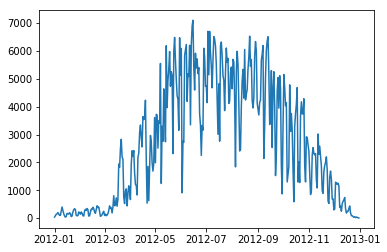

In [109]:
plt.plot(bikes_df['Berri1'].index.values, bikes_df['Berri1'].values)

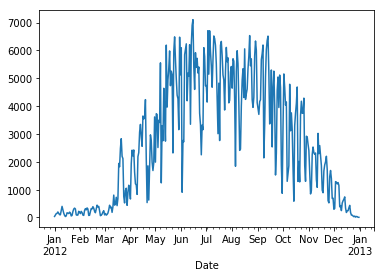

In [108]:
bikes_df['Berri1'].plot()

We can also plot all the columns just as easily. 

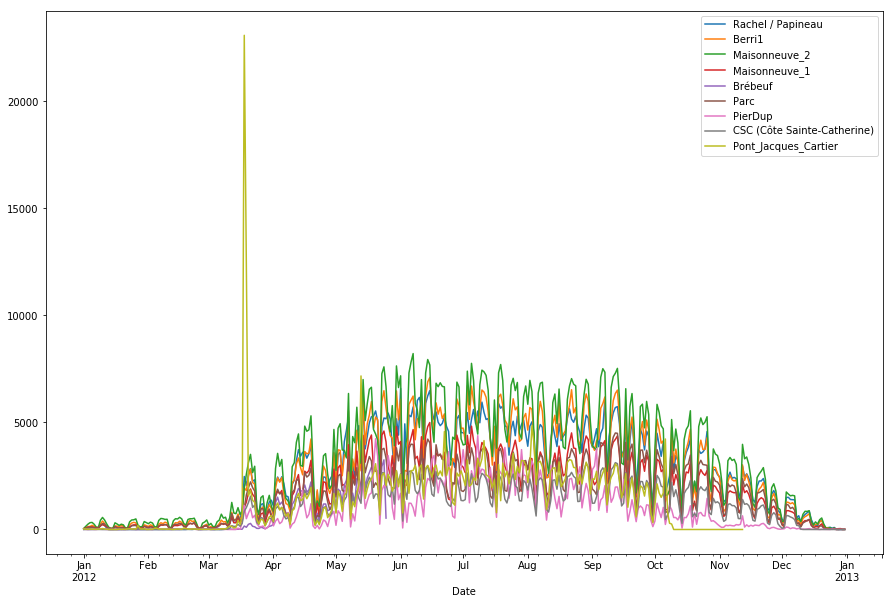

In [110]:
bikes_df.plot(figsize=(15, 10))

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [111]:
bikes_df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [112]:
# get row for date 2012-01-01
bikes_df.loc['2012-01-01']

Unnamed: 1                     00:00
Rachel / Papineau                 16
Berri1                            35
Maisonneuve_2                     51
Maisonneuve_1                     38
Brébeuf                            5
Parc                              26
PierDup                           10
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier              27
Name: 2012-01-01 00:00:00, dtype: object

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [114]:
bikes_df.iloc[10]

Unnamed: 1                     00:00
Rachel / Papineau                194
Berri1                           273
Maisonneuve_2                    443
Maisonneuve_1                    182
Brébeuf                            7
Parc                             258
PierDup                           12
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier              20
Name: 2012-01-11 00:00:00, dtype: object

## Slicing of dataframe

In [116]:
bikes_df.columns[:2]

Index(['Unnamed: 1', 'Rachel / Papineau'], dtype='object')

In [118]:
bikes_df[['Unnamed: 1', 'Rachel / Papineau']][:5]

,Unnamed: 1,Rachel / Papineau
Date,,
2012-01-01,00:00,16
2012-01-02,00:00,43
2012-01-03,00:00,58
2012-01-04,00:00,61
2012-01-05,00:00,95


In [120]:
# fetch first 5 rows and last 2 columns of dataframe
bikes_df[bikes_df.columns[-2:]][:5]

,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,
2012-01-01,0,27.0
2012-01-02,1,21.0
2012-01-03,2,15.0
2012-01-04,1,19.0
2012-01-05,2,16.0


In [123]:
# fetch first 5 rows of a specific column
bikes_df['Berri1'][:5]

Date
2012-01-01     35
2012-01-02     83
2012-01-03    135
2012-01-04    144
2012-01-05    197
Name: Berri1, dtype: int64

## Value counts

Get count of unique values in a particular column/Series.

In [127]:
genre_counts = imdb_df['genre'].value_counts()

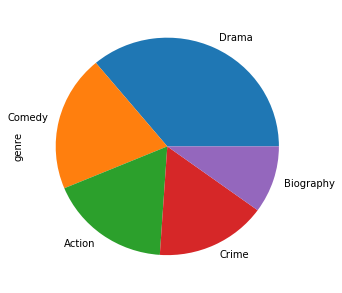

In [132]:
genre_counts[:5].plot(kind='pie', figsize=(5,5))

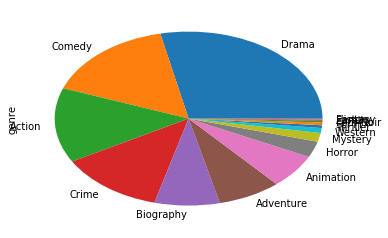

In [126]:
# plotting value counts as a bar chart
imdb_df['genre'].value_counts().plot(kind='pie')

# Selecting rows where column has a particular value

In [136]:
imdb_df[imdb_df['star_rating'] > 9]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [139]:
imdb_df[(imdb_df['star_rating'] > 8) & 
        (imdb_df['duration'] > 140)]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."


In [ ]:
# select only those movies where genre is adventure
adventure_movies = imdb_df[imdb_df['genre'] == 'Adventure']

In [ ]:
adventure_movies.head()

In [ ]:
good_adventure_movies = imdb_df[(imdb_df['genre'] == 'Adventure') & (imdb_df['star_rating'] > 8.4)]

In [ ]:
good_adventure_movies

In [ ]:
# organised way
is_adventure = imdb_df['genre'] == 'Adventure'
has_high_rating = imdb_df['star_rating'] > 8.4
good_adventure_movies = imdb_df[is_adventure & has_high_rating]

# Just see title and duration of good adventure movies
good_adventure_movies[['title', 'duration']]

In [ ]:
# which genre has highest number of movies with star rating above 8?
has_above_8_rating = imdb_df['star_rating'] >= 8.0
good_movies = imdb_df[has_above_8_rating]
good_movies_genre_count = good_movies['genre'].value_counts()

In [ ]:
good_movies_genre_count

In [ ]:
good_movies_genre_count.idxmax()

## Adding a new column to DataFrame

In [171]:
bikes_df['weekday'] = bikes_df.index.weekday_name

In [167]:
bikes_df = bikes_df[['Unnamed: 1', 'weekday', 'Rachel / Papineau', 'Berri1', 'Maisonneuve_2',
       'Maisonneuve_1', 'Brébeuf', 'Parc', 'PierDup',
       'CSC (Côte Sainte-Catherine)', 'Pont_Jacques_Cartier']]

In [172]:
bikes_df.head()

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0,Sunday
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0,Monday
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0,Tuesday
2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0,Wednesday
2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0,Thursday


## Deleting an existing column from DataFrame

In [176]:
bikes_df.head()

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,
2012-01-01,16,35,51,38,5.0,26,10,0,27.0,Sunday
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,Monday
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,Tuesday
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,Wednesday
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,Thursday


In [173]:
bikes_df.drop('Unnamed: 1', axis=1)

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,
2012-01-01,16,35,51,38,5.0,26,10,0,27.0,Sunday
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,Monday
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,Tuesday
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,Wednesday
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,Thursday
2012-01-06,75,146,244,98,4.0,86,4,0,17.0,Friday
2012-01-07,54,98,108,80,5.0,53,6,2,9.0,Saturday
2012-01-08,63,95,98,62,13.0,64,11,1,23.0,Sunday
2012-01-09,173,244,432,165,9.0,198,12,2,23.0,Monday


In [175]:
bikes_df.drop('Unnamed: 1', axis=1, inplace=True)

In [178]:
bikes_df.columns[[0,1,2]]

Index(['Rachel / Papineau', 'Berri1', 'Maisonneuve_2'], dtype='object')

In [179]:
# deleting column no. 1, 2, and 3
bikes_df.drop(bikes_df.columns[[1,2,3]], axis=1)

,Rachel / Papineau,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,
2012-01-01,16,5.0,26,10,0,27.0,Sunday
2012-01-02,43,11.0,53,6,1,21.0,Monday
2012-01-03,58,2.0,89,3,2,15.0,Tuesday
2012-01-04,61,2.0,111,8,1,19.0,Wednesday
2012-01-05,95,6.0,97,13,2,16.0,Thursday
2012-01-06,75,4.0,86,4,0,17.0,Friday
2012-01-07,54,5.0,53,6,2,9.0,Saturday
2012-01-08,63,13.0,64,11,1,23.0,Sunday
2012-01-09,173,9.0,198,12,2,23.0,Monday


## Deleting a row in DataFrame

In [180]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [181]:
df.drop(df.index[0])

,Names,Births
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [188]:
bikes_df.drop(bikes_df.index[0])

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,Monday
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,Tuesday
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,Wednesday
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,Thursday
2012-01-06,75,146,244,98,4.0,86,4,0,17.0,Friday
2012-01-07,54,98,108,80,5.0,53,6,2,9.0,Saturday
2012-01-08,63,95,98,62,13.0,64,11,1,23.0,Sunday
2012-01-09,173,244,432,165,9.0,198,12,2,23.0,Monday
2012-01-10,241,397,563,238,6.0,275,18,3,46.0,Tuesday


In [184]:
bikes_df.loc['2012-01-01']

Rachel / Papineau                  16
Berri1                             35
Maisonneuve_2                      51
Maisonneuve_1                      38
Brébeuf                             5
Parc                               26
PierDup                            10
CSC (Côte Sainte-Catherine)         0
Pont_Jacques_Cartier               27
weekday                        Sunday
Name: 2012-01-01 00:00:00, dtype: object

In [ ]:
df.drop([0,1,2])

In [189]:
# drop movies with rating less than 9.0
has_poor_rating = imdb_df['star_rating'] < 9.0
imdb_df.drop(imdb_df[has_poor_rating].index)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition



In [200]:
weekday_groups = bikes_df.groupby('weekday')

In [201]:
weekday_groups.get_group('Sunday')

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,
2012-01-01,16,35,51,38,5.0,26,10,0,27.0,Sunday
2012-01-08,63,95,98,62,13.0,64,11,1,23.0,Sunday
2012-01-15,0,54,60,33,0.0,18,0,0,2.0,Sunday
2012-01-22,0,71,73,41,20.0,35,5,0,29.0,Sunday
2012-01-29,0,87,132,65,6.0,40,7,1,20.0,Sunday
2012-02-05,0,72,133,46,11.0,54,7,0,58.0,Sunday
2012-02-12,0,78,91,36,4.0,53,5,0,7.0,Sunday
2012-02-19,2,169,205,110,7.0,113,13,3,38.0,Sunday
2012-02-26,0,78,47,76,2.0,35,4,0,14.0,Sunday


In [202]:
weekday_counts = weekday_groups.aggregate(sum)

In [205]:
weekday_counts = weekday_counts.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

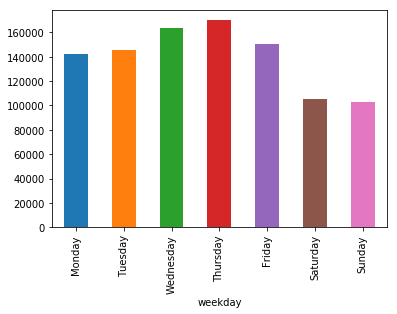

In [206]:
weekday_counts['Berri1'].plot(kind='bar')

Let us see one more example!

In [213]:
genre_groups = imdb_df.groupby('genre')

In [214]:
genre_groups.groups

{'Action': Int64Index([  3,  11,  12,  19,  20,  36,  37,  43,  44,  45,
             ...
             884, 885, 896, 906, 908, 918, 954, 963, 967, 976],
            dtype='int64', length=136),
 'Adventure': Int64Index([  7,  10,  14,  15,  54,  68,  71,  85, 101, 114, 120, 128, 133,
             137, 140, 142, 164, 179, 204, 206, 214, 222, 224, 245, 271, 299,
             309, 310, 328, 333, 336, 339, 359, 362, 368, 376, 393, 419, 424,
             429, 445, 454, 479, 510, 520, 522, 537, 551, 555, 564, 576, 605,
             629, 642, 658, 662, 698, 727, 754, 758, 794, 814, 852, 891, 898,
             900, 909, 911, 932, 935, 936, 937, 943, 953, 975],
            dtype='int64'),
 'Animation': Int64Index([ 30,  55,  61,  64,  69,  81, 117, 126, 131, 147, 160, 167, 192,
             193, 241, 256, 277, 294, 303, 305, 308, 332, 343, 357, 378, 381,
             386, 395, 414, 417, 443, 453, 461, 471, 487, 489, 494, 498, 501,
             512, 518, 541, 607, 617, 625, 656, 657, 664, 669, 6

In [215]:
# get crime movies group
genre_groups.get_group('Crime')

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
23,8.7,The Usual Suspects,R,Crime,106,"[u'Kevin Spacey', u'Gabriel Byrne', u'Chazz Pa..."
28,8.6,Leon: The Professional,R,Crime,110,"[u'Jean Reno', u'Gary Oldman', u'Natalie Portm..."
34,8.6,American History X,R,Crime,119,"[u'Edward Norton', u'Edward Furlong', u""Beverl..."
40,8.5,The Green Mile,R,Crime,189,"[u'Tom Hanks', u'Michael Clarke Duncan', u'Dav..."
49,8.5,The Departed,R,Crime,151,"[u'Leonardo DiCaprio', u'Matt Damon', u'Jack N..."


In [216]:
import numpy as np

In [217]:
averages = genre_groups.aggregate(np.mean)

In [218]:
averages

,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


In [219]:
# get sum, mean and std-dev of movie durations for each group
duration_analysis = genre_groups['duration'].aggregate([np.sum, np.mean, np.std])

In [220]:
duration_analysis

,sum,mean,std
genre,,,
Action,17202,126.485294,21.982480
Adventure,10113,134.840000,33.383942
Animation,5989,96.596774,13.975927
Biography,10152,131.844156,24.283991
Comedy,16786,107.602564,20.101574
Crime,15165,122.298387,25.054406
Drama,35178,126.539568,25.637086
Family,215,107.500000,10.606602
Fantasy,112,112.000000,NaN


In [221]:
# change duration of all movies in a particular genre to mean duration of the group
averaged_movie_durations = genre_groups['duration'].transform(lambda x:x.mean())

In [222]:
averaged_movie_durations

0      122.298387
1      122.298387
2      122.298387
3      126.485294
4      122.298387
5      126.539568
6      136.666667
7      134.840000
8      131.844156
9      126.539568
10     134.840000
11     126.485294
12     126.485294
13     126.539568
14     134.840000
15     134.840000
16     126.539568
17     126.539568
18     131.844156
19     126.485294
20     126.485294
21     122.298387
22     126.539568
23     122.298387
24     126.539568
25     107.602564
26     136.666667
27     126.539568
28     122.298387
29     107.602564
          ...    
949    107.602564
950    122.298387
951    126.539568
952    107.602564
953    134.840000
954    126.485294
955    126.539568
956    107.602564
957    107.602564
958    126.539568
959    107.602564
960    107.602564
961    131.844156
962    107.602564
963    126.485294
964    131.844156
965    115.625000
966     96.596774
967    126.485294
968    126.539568
969    122.298387
970    126.539568
971    107.602564
972    126.539568
973    126

In [224]:
# drop groups/genres that do not have average movie duration greater than 120.
genre_groups.filter(lambda x: x['duration'].mean() > 120)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


## Exercises:

https://github.com/guipsamora/pandas_exercises/

Practice pandas using these exercises. Every exercise has 3 notebooks:
- Exercise
- Solutions
- Exercise with solutions

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)